In [6]:
import pandas as pd
import os
import pickle

# Directory containing the CSV files
directory = '/Users/marcgurber/Library/CloudStorage/OneDrive-SharedLibraries-Swiss-Ski/Teams_My Swiss-Ski - Analytics - Code/Lists_FIS'

# Get a list of all the files (filenames) in the directory
file_list = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Extract year and number from filenames and keep track of the highest number for each year
file_dict = {}
for file in file_list:
    parts = file.split('-')
    if len(parts) >= 5:
        year = parts[4]
        number = int(parts[5].split('.')[0])
        print(f"Processing file: {file}, Year: {year}, Number: {number}")
        if year not in file_dict or number > file_dict[year][1]:
            file_dict[year] = (file, number)
            print(f"Updated file_dict[{year}] to: {file_dict[year]}")

print("File dictionary:", file_dict)

# Get the list of files with the highest number for each year
highest_number_files = [os.path.join(directory, file_dict[year][0]) for year in file_dict]

# Read and combine the data from these files
dfs = [pd.read_csv(file) for file in highest_number_files]
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a pickle file
pickle_file_path = os.path.join(directory, 'fis_list_combined_export2.pkl')
with open(pickle_file_path, 'wb') as f:
    pickle.dump(combined_df, f)
print(f"Combined DataFrame saved to: {pickle_file_path}")
    

Processing file: FIS-points-list-AL-2020-296.csv, Year: 2020, Number: 296
Updated file_dict[2020] to: ('FIS-points-list-AL-2020-296.csv', 296)
Processing file: FIS-points-list-AL-2023-355.csv, Year: 2023, Number: 355
Updated file_dict[2023] to: ('FIS-points-list-AL-2023-355.csv', 355)
Processing file: FIS-points-list-AL-2022-344.csv, Year: 2022, Number: 344
Updated file_dict[2022] to: ('FIS-points-list-AL-2022-344.csv', 344)
Processing file: FIS-points-list-AL-2017-246.csv, Year: 2017, Number: 246
Updated file_dict[2017] to: ('FIS-points-list-AL-2017-246.csv', 246)
Processing file: FIS-points-list-AL-2021-324.csv, Year: 2021, Number: 324
Updated file_dict[2021] to: ('FIS-points-list-AL-2021-324.csv', 324)
Processing file: FIS-points-list-AL-2021-318.csv, Year: 2021, Number: 318
Processing file: FIS-points-list-AL-2015-223.csv, Year: 2015, Number: 223
Updated file_dict[2015] to: ('FIS-points-list-AL-2015-223.csv', 223)
Processing file: FIS-points-list-AL-2015-222.csv, Year: 2015, Number

Top 3 DH     birthyear  Season     MeanInt     MeanSUI
0        1998    2017  190.000000  197.000000
1        1999    2018  220.666667  327.666667
2        2000    2019  193.333333  321.666667
3        2001    2020  189.666667  337.666667
4        2002    2021  172.000000  236.000000
5        2003    2022  211.666667  204.333333
6        2004    2023  154.333333  197.666667
7        2005    2024  165.000000  253.000000
8        2006    2025  198.000000  311.000000
9        2007    2026         NaN         NaN
10       2008    2027         NaN         NaN
Top 10 DH     birthyear  Season  MeanInt  MeanSUI
0        1998    2017    220.1    364.7
1        1999    2018    253.4    471.0
2        2000    2019    253.0    437.8
3        2001    2020    236.7    403.0
4        2002    2021    200.9    352.9
5        2003    2022    239.0    306.4
6        2004    2023    215.8    331.7
7        2005    2024    210.9    356.9
8        2006    2025    228.7    399.4
9        2007    2026      Na

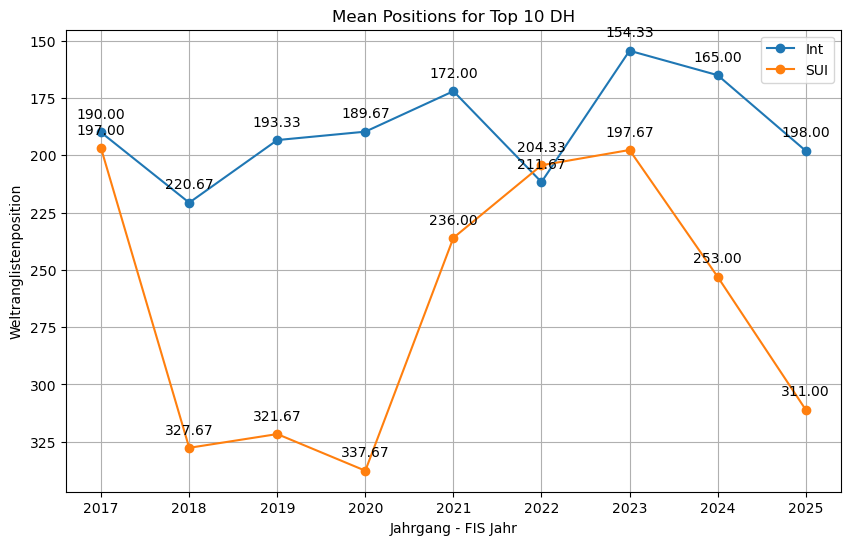

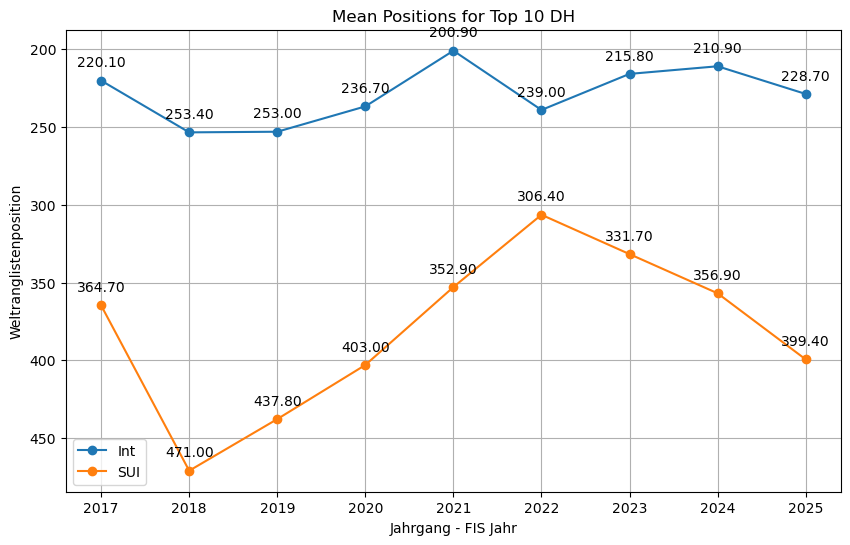

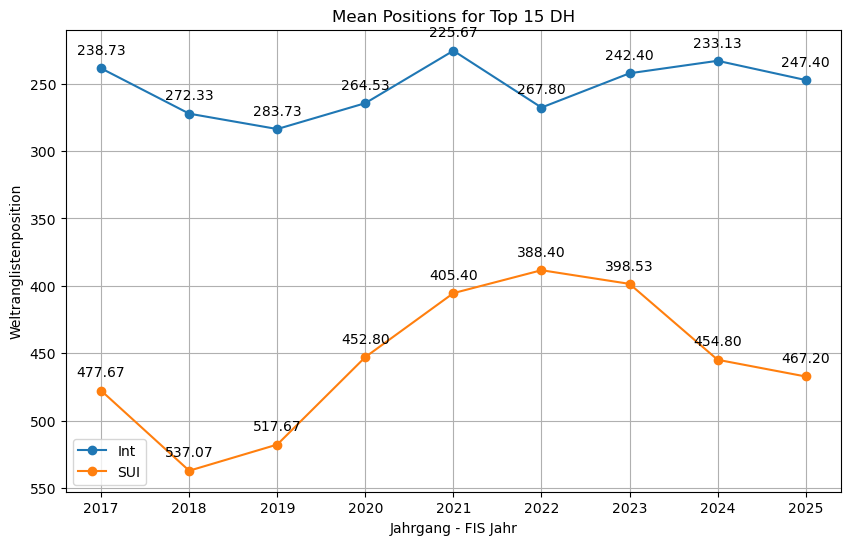

In [8]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

def getMeanTopX_Int(df_season, disciplin, top):
    df_Int = df_season[df_season['Nationcode'] != 'SUI']
    df_Int = df_Int.sort_values(by= str(disciplin) +'pos', ascending=True)
    df_Int = df_Int.head(top)       
    mean_dhpos = df_Int[str(disciplin) +'pos'].mean()

    return mean_dhpos
    
def getMeanTopX_SUI(df_season, disciplin, top):
    df_SUI = df_season[df_season['Nationcode'] == 'SUI']
    df_SUI = df_SUI.sort_values(by= str(disciplin) +'pos', ascending=True)
    df_SUI = df_SUI.head(top)       
    mean_dhpos = df_SUI[str(disciplin) +'pos'].mean()
    return mean_dhpos

pickle_file_path = 'fis_list_combined_export.pkl'
if os.path.exists(pickle_file_path):
    with open(pickle_file_path, 'rb') as f:
        combined_df = pickle.load(f)
else:
    print(f"Pickle file not found at {pickle_file_path}")
#print("FIS Point List Combined:", combined_df)

combined_df['Listname'] = combined_df['Listname'].astype(str)
combined_df['Listyear'] = combined_df['Listname'].str[-4:]
combined_df['Listyear'] = combined_df['Listyear'].replace("4/25", "2025")


birthyear = 1998
FISYear = 3
Gender = 'M'    
disciplin = 'DH'
#season = birthyear + 16 + FISYear


def collect_data(birthyear, FISYear, Gender, top, disciplin, combined_df):
    data = []
    for i in range(11):
        season = birthyear + 16 + FISYear
        df_season = combined_df[(combined_df['Birthyear'] == birthyear) & (combined_df['Listyear'] == str(season)) & (combined_df['Gender'] == Gender)]
        MeanInt = getMeanTopX_Int(df_season, disciplin, top)
        MeanSUI = getMeanTopX_SUI(df_season, disciplin, top)
        data.append({
            'birthyear': birthyear,
            'Season': season,
            'MeanInt': MeanInt,
            'MeanSUI': MeanSUI
        })
        birthyear += 1
    return pd.DataFrame(data)

# Call the function and store the result in df_results
df_results_top3 = collect_data(birthyear, FISYear, Gender, 3, disciplin, combined_df)
df_results_top10 = collect_data(birthyear, FISYear, Gender, 10, disciplin, combined_df)
df_results_top15 = collect_data(birthyear, FISYear, Gender, 15, disciplin, combined_df)

# Display the DataFrame
print('Top 3 ' + str(disciplin), df_results_top3) 
print('Top 10 ' + str(disciplin), df_results_top10)
print('Top 15 ' + str(disciplin), df_results_top15)

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_results_top3['Season'], df_results_top3['MeanInt'], label='Int', marker='o')
ax1.plot(df_results_top3['Season'], df_results_top3['MeanSUI'], label='SUI', marker='o')

# Annotate each data point with its value
for i, txt in enumerate(df_results_top3['MeanInt']):
    ax1.annotate(f'{txt:.2f}', (df_results_top3['Season'][i], df_results_top3['MeanInt'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(df_results_top3['MeanSUI']):
    ax1.annotate(f'{txt:.2f}', (df_results_top3['Season'][i], df_results_top3['MeanSUI'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Jahrgang - FIS Jahr')
plt.ylabel('Weltranglistenposition')
plt.title('Mean Positions for Top 10 ' + str(disciplin)) 
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

# Hide the original x-axis
ax1.xaxis.set_visible(False)

plt.show()

# Plot for Top 10
plt.figure(figsize=(10, 6))
plt.plot(df_results_top10['Season'], df_results_top10['MeanInt'], label='Int', marker='o')
plt.plot(df_results_top10['Season'], df_results_top10['MeanSUI'], label='SUI', marker='o')

# Annotate each data point with its value
for i, txt in enumerate(df_results_top10['MeanInt']):
    plt.annotate(f'{txt:.2f}', (df_results_top10['Season'][i], df_results_top10['MeanInt'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(df_results_top10['MeanSUI']):
    plt.annotate(f'{txt:.2f}', (df_results_top10['Season'][i], df_results_top10['MeanSUI'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Jahrgang - FIS Jahr')
plt.ylabel('Weltranglistenposition')
plt.title('Mean Positions for Top 10 ' + str(disciplin)) 
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

# Plot for Top 15
plt.figure(figsize=(10, 6))
plt.plot(df_results_top15['Season'], df_results_top15['MeanInt'], label='Int', marker='o')
plt.plot(df_results_top15['Season'], df_results_top15['MeanSUI'], label='SUI', marker='o')

# Annotate each data point with its value
for i, txt in enumerate(df_results_top15['MeanInt']):
    plt.annotate(f'{txt:.2f}', (df_results_top15['Season'][i], df_results_top15['MeanInt'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(df_results_top15['MeanSUI']):
    plt.annotate(f'{txt:.2f}', (df_results_top15['Season'][i], df_results_top15['MeanSUI'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Jahrgang - FIS Jahr')
plt.ylabel('Weltranglistenposition')
plt.title('Mean Positions for Top 15 ' + str(disciplin)) 
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()


In [ ]:
def collect_data(birthyear, FISYear, Gender, top, disciplin, combined_df):
    data = []
    for i in range(11):
        season = birthyear + 16 + FISYear
        df_season = combined_df[(combined_df['Birthyear'] == birthyear) & (combined_df['Listyear'] == str(season)) & (combined_df['Gender'] == Gender)]
        MeanInt = getMeanTopX_Int(df_season, disciplin, top)
        MeanSUI = getMeanTopX_SUI(df_season, disciplin, top)
        data.append({
            'birthyear': birthyear,
            'Season': season,
            'MeanInt': MeanInt,
            'MeanSUI': MeanSUI
        })
        birthyear += 1
    return pd.DataFrame(data)

def getMeanTopX_Int(df_season, disciplin, top):
    df_Int = df_season[df_season['Nationcode'] != 'SUI']
    df_Int = df_Int.sort_values(by= str(disciplin) +'pos', ascending=True)
    df_Int = df_Int.head(top)       
    mean_dhpos = df_Int[str(disciplin) +'pos'].mean()

    return mean_dhpos
    
def getMeanTopX_SUI(df_season, disciplin, top):
    df_SUI = df_season[df_season['Nationcode'] == 'SUI']
    df_SUI = df_SUI.sort_values(by= str(disciplin) +'pos', ascending=True)
    df_SUI = df_SUI.head(top)       
    mean_dhpos = df_SUI[str(disciplin) +'pos'].mean()
    return mean_dhpos



pickle_file_path = 'fis_list_combined_export.pkl'
if os.path.exists(pickle_file_path):
    with open(pickle_file_path, 'rb') as f:
        combined_df = pickle.load(f)
else:
    print(f"Pickle file not found at {pickle_file_path}")
#print("FIS Point List Combined:", combined_df)

combined_df['Listname'] = combined_df['Listname'].astype(str)
combined_df['Listyear'] = combined_df['Listname'].str[-4:]
combined_df['Listyear'] = combined_df['Listyear'].replace("4/25", "2025")

birthyear = 1998
FISYear = 3
Gender = 'M'    
disciplin = 'DH'




In [7]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
pickle_file_path = 'data/fis_list_combined_export2.pkl'
if os.path.exists(pickle_file_path):
    with open(pickle_file_path, 'rb') as f:
        combined_df = pickle.load(f)
else:
    print(f"Pickle file not found at {pickle_file_path}")
combined_df.head()

,Listid,Listname,listPublished,Published,Sectorcode,Status,Competitorid,Fiscode,Lastname,Firstname,...,SLSta,GSpoints,GSpos,GSSta,SGpoints,SGpos,SGSta,ACpoints,ACpos,ACSta
0,304,19th FIS points list 2019/2020,1,1,AL,O,236444,120097,A KE,Zhuoli,...,NaN,183.65,4736.0,*,NaN,NaN,NaN,NaN,NaN,NaN
1,304,19th FIS points list 2019/2020,1,1,AL,E,219656,502468,AABERG,Filip,...,*,83.03,2119.0,*,94.32,999.0,*,NaN,NaN,NaN
2,304,19th FIS points list 2019/2020,1,1,AL,O,222777,422781,AAGESEN,Tinius,...,NaN,50.43,795.0,NaN,114.09,1429.0,*,257.76,1263.0,*
3,304,19th FIS points list 2019/2020,1,1,AL,O,228310,502523,AAHS,Albin,...,NaN,61.51,1258.0,NaN,83.00,766.0,*,NaN,NaN,NaN
4,304,19th FIS points list 2019/2020,1,1,AL,O,202606,502327,AAKERSTROEM,Joel,...,*,66.02,1452.0,NaN,117.39,1483.0,*,999.99,1393.0,*
